# 7CCMFM18 Machine Learning
King's College London <br>
Academic year 2022-2023 <br>
Lecturer: Mario Martone

## Example: Underfitting and Overfitting
First version: <i>7th March 2023</i>

In this exercise, you’ll learn how a neural network with too low or too high capacity, can underfit or overfit your data. We will build a network which will infer the quality of red wine from various other characteristics.

First importing the correct libraries:

In [45]:
import pandas as pd
from IPython.display import display

from tensorflow import keras
from tensorflow.keras import layers, callbacks

Now to set things up download the redwine.csv dataset from Keats, put it in the same folder as the notebook and run the cell below:

In [46]:
red_wine = pd.read_csv('redwine_data.csv',index_col=0)

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]cc
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

input_shape=[X_train.shape[1]]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1110,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1033,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1003,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
488,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [47]:
y_train.shape

(1119,)

Now let's build a model and train it to check its performance:

In [51]:
model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=input_shape),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

Let's train it and plot how the test/validation as well as the training loss behave as a function of the epochs:

Minimal validation loss: 0.10842034220695496
Final validation loss: 0.10842034220695496


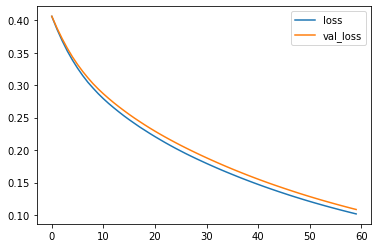

In [157]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=60,
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot();
print("Minimal validation loss: {}".format(history_df['val_loss'].min()))
print("Final validation loss: {}".format(history_df['val_loss'].iloc[-1]))

It's not uncommon for the curves to follow more rapidly in the beginning, this is often called a "hockey stick" pattern. This makes the final part of training hard to see, so let's start at epoch 15 instead:

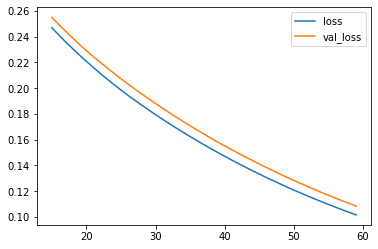

In [158]:
history_df.loc[15:, ['loss', 'val_loss']].plot();

# Questions:

1. How does this network fit the data? Does it underfit, overfit or is it just about right?

2. Build a wider model with a 50 dimensional hidden layer, train it and plot loss/val_loss. How does this fit the data?

3. Build a deeper model with two 10 dimensional hidden layers, train it and plot loss/val_loss. How does this fit the data?

4. Build a wider and deeper model with two 200 dimensional hidden layers, train it and plot loss/val_loss. How does this fit the data? 

Please provide clear arguments for each one of your choices.